In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
from tweet_classifier import ModelTrainer
from sklearn.metrics import (
    accuracy_score,
    f1_score,
    recall_score,
    precision_score,
    confusion_matrix,
)
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import learning_curve
from sklearn.svm import SVC
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('../data/lemmatizer_tfidf.csv', index_col=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4392 entries, 9765 to 2898
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   keyword            4392 non-null   object
 1   location           4392 non-null   object
 2   text               4392 non-null   object
 3   target             4392 non-null   int64 
 4   word_count         4392 non-null   int64 
 5   stop_word_count    4392 non-null   int64 
 6   url_count          4392 non-null   int64 
 7   mean_word_length   4392 non-null   object
 8   char_count         4392 non-null   int64 
 9   punctuation_count  4392 non-null   int64 
 10  hashtags           1073 non-null   object
 11  mentions           1222 non-null   object
 12  urls               2408 non-null   object
 13  tokens             4392 non-null   object
 14  vector             4392 non-null   object
dtypes: int64(6), object(9)
memory usage: 549.0+ KB


In [12]:
test = df.select_dtypes(include="object")
test.info()
test['mean_word_length']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4392 entries, 9765 to 2898
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   keyword           4392 non-null   object
 1   location          4392 non-null   object
 2   text              4392 non-null   object
 3   mean_word_length  4392 non-null   object
 4   hashtags          1073 non-null   object
 5   mentions          1222 non-null   object
 6   urls              2408 non-null   object
 7   tokens            4392 non-null   object
 8   vector            4392 non-null   object
dtypes: object(9)
memory usage: 343.1+ KB


id
9765     5 428571428571429
6896     5 421052631578948
8356                   5 0
2661     8 083333333333334
8176     6 611111111111111
               ...        
6065     4 578947368421052
818     5 2727272727272725
4604     6 666666666666667
7752     8 266666666666667
2898                   4 0
Name: mean_word_length, Length: 4392, dtype: object

In [3]:
models = {
    "LogisticRegression": LogisticRegression(max_iter=1000),
    "DecisionTree": DecisionTreeClassifier(),
    "RandomForest": RandomForestClassifier(),
    "SVM": SVC(),
    "XGBoost": XGBClassifier(eval_metric="logloss")
}

### Pipeline


==== LogisticRegression ====
[[726 148]
 [505 144]]
              precision    recall  f1-score   support

           0       0.59      0.83      0.69       874
           1       0.49      0.22      0.31       649

    accuracy                           0.57      1523
   macro avg       0.54      0.53      0.50      1523
weighted avg       0.55      0.57      0.53      1523



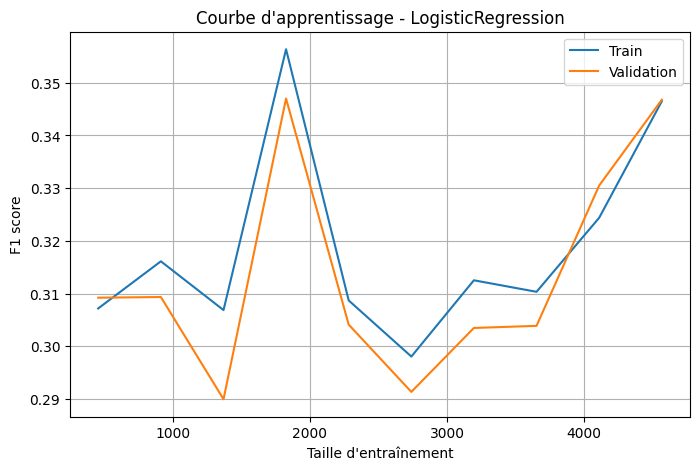


==== DecisionTree ====
[[645 229]
 [317 332]]
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       874
           1       0.59      0.51      0.55       649

    accuracy                           0.64      1523
   macro avg       0.63      0.62      0.63      1523
weighted avg       0.64      0.64      0.64      1523



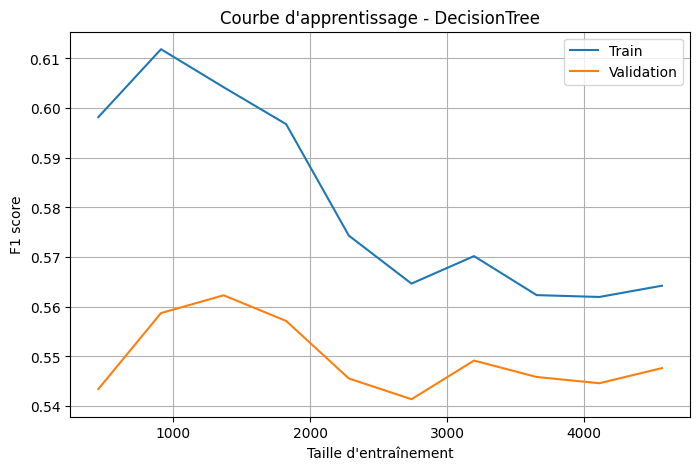


==== RandomForest ====
[[641 233]
 [316 333]]
              precision    recall  f1-score   support

           0       0.67      0.73      0.70       874
           1       0.59      0.51      0.55       649

    accuracy                           0.64      1523
   macro avg       0.63      0.62      0.62      1523
weighted avg       0.64      0.64      0.64      1523



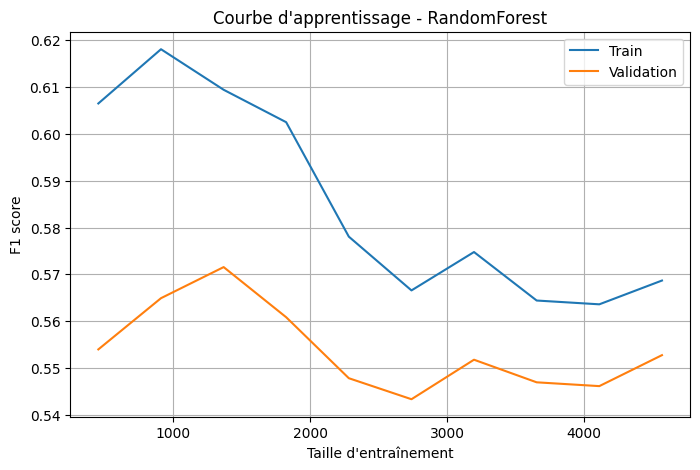


==== SVM ====
[[678 196]
 [330 319]]
              precision    recall  f1-score   support

           0       0.67      0.78      0.72       874
           1       0.62      0.49      0.55       649

    accuracy                           0.65      1523
   macro avg       0.65      0.63      0.63      1523
weighted avg       0.65      0.65      0.65      1523



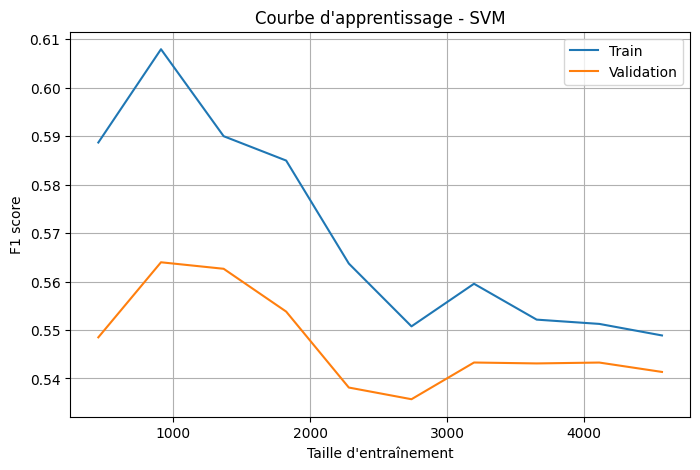


==== XGBoost ====
[[647 227]
 [315 334]]
              precision    recall  f1-score   support

           0       0.67      0.74      0.70       874
           1       0.60      0.51      0.55       649

    accuracy                           0.64      1523
   macro avg       0.63      0.63      0.63      1523
weighted avg       0.64      0.64      0.64      1523



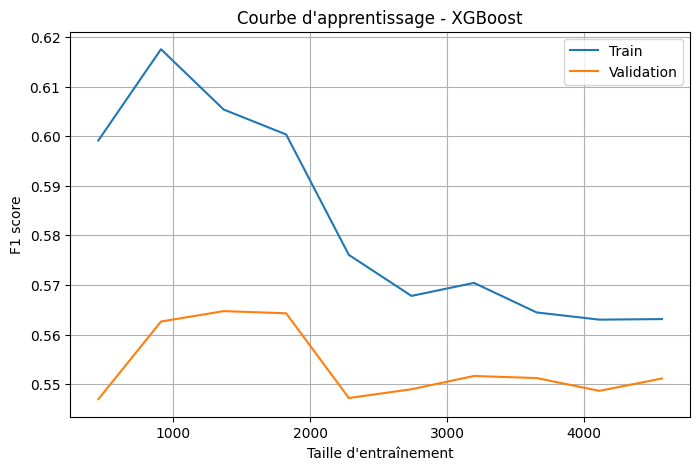

In [ ]:
trainer = ModelTrainer(models)
X, y = trainer.prepare_data("../data/test_code_modeling.csv")
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
for name, model in models.items():
    trainer.evaluate_model(name, model, X_train, y_train, X_test, y_test)


In [ ]:
chosen_model_name = "RandomForest"
chosen_model = trainer.get_trained_model(chosen_model_name)

# === Fine-tuning de ce modèle ===
# param_grid = {"n_estimators": [100, 200], "max_depth": [None, 10, 20]}
# trainer.tune_model(chosen_model_name, param_grid, X_train, y_train)

# === Sauvegarde du modèle ===
# trainer.save_model(chosen_model_name, path="random_forest.pkl")

Modèle 'RandomForest' sauvegardé dans random_forest.pkl
